In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

# Task 1: Exploratory Data Analysis (EDA) and Initial Cleaning

1. Load and Inspect: Load the telecom_churn.csv dataset

In [2]:
df = pd.read_csv("Telecom_churn.csv")

2. Initial Cleaning:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")

In [5]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["TotalCharges"].median())
df["InternetService"] = df["InternetService"].fillna(df["InternetService"].mode()[0])
df["MonthlyCharges"] = df["MonthlyCharges"].fillna(df["MonthlyCharges"].median())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

3. Data Visualization:

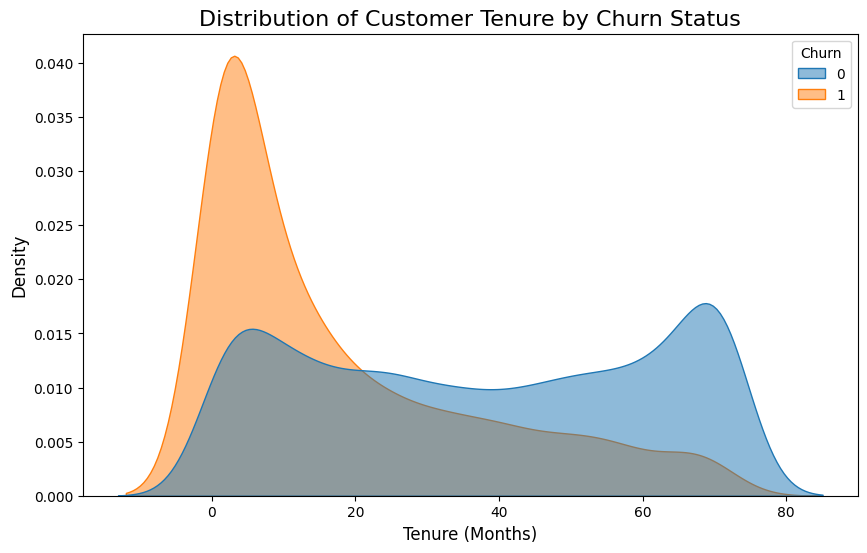

In [10]:
plt.figure(figsize=(10,6))
sns.kdeplot(data=df, x = 'tenure', hue = 'Churn', fill = True, common_norm = False, alpha = 0.5)
plt.title('Distribution of Customer Tenure by Churn Status', fontsize=16)
plt.xlabel('Tenure (Months)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

This shows that customers who churn have a distribution heavily skewed towards lower tenure (fewer months). This indicates that new customers are much more likely to churn. Conversely, the distribution for non-churned customers will show a more even spread, with a large group of long-term, loyal customers.

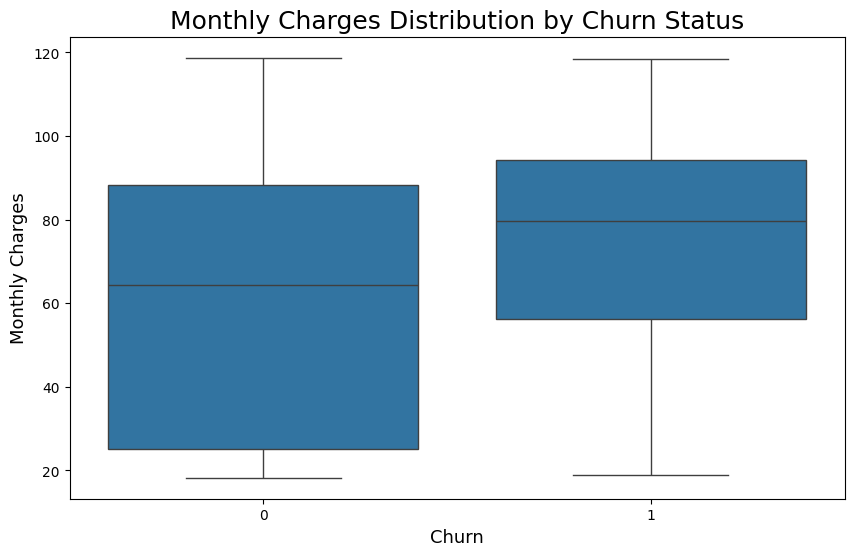

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges Distribution by Churn Status', fontsize=18)
plt.xlabel('Churn', fontsize=13)
plt.ylabel('Monthly Charges', fontsize=13)
plt.show()

This shows that the median monthly charge is higher for customers who churn. This suggests that customers with more expensive plans are more likely to leave, possibly due to price sensitivity or perceived value.

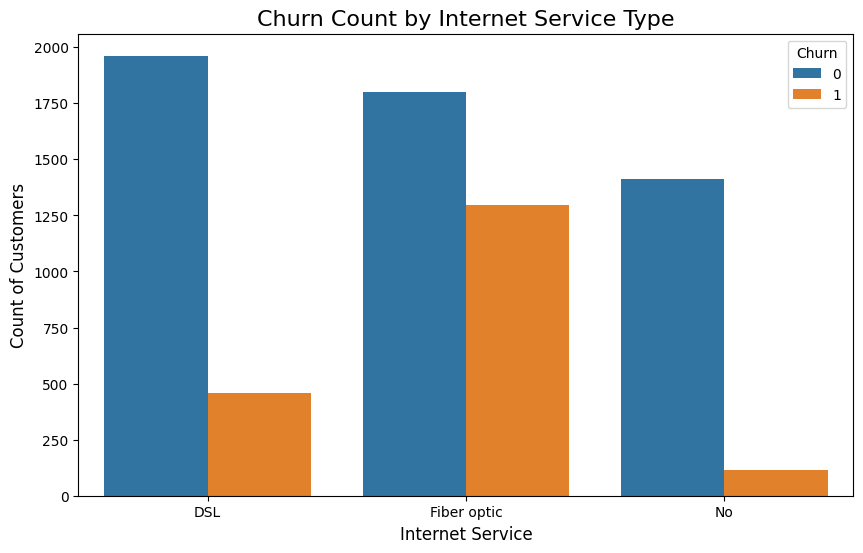

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn Count by Internet Service Type', fontsize=16)
plt.xlabel('Internet Service', fontsize=12)
plt.ylabel('Count of Customers', fontsize=12)
plt.show()

This plot shows that customers with "Fiber optic" service have a high count of churn. While this might seem counterintuitive for a premium service, it could suggest issues with price, reliability, or that it attracts customers with higher expectations who are quicker to leave if dissatisfied.

# Task 2: Feature Engineering

In [13]:
df["AvgMonthlyTickets"] = np.where(df['tenure'] > 0, (df['numAdminTickets'] + df['numTechTickets']) / df['tenure'], 0).round(2)
df["HasPhoneService"] = df["PhoneService"].map({"Yes": 1, "No": 0})

df[["AvgMonthlyTickets", "HasPhoneService"]].head()

,AvgMonthlyTickets,HasPhoneService
0,0.00,0
1,0.00,1
2,0.00,1
3,0.07,0
4,0.00,1


# Task 3: Building the End-to-End Pipeline

1. Define Preprocessing Steps:

In [14]:
X = df.drop(columns=['Churn', 'customerID', 'TotalCharges'])
y = df['Churn']

In [15]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()


2. Integrate with Pipeline:

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [17]:
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(max_iter=1000,class_weight="balanced"))])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
lr_pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Task 4: Model Selection and Hyperparameter Tuning

1. Choose Models:

In [20]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

for name, clf in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", clf)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"{name}: F1-weighted = {f1:.3f}")

Logistic Regression: F1-weighted = 0.855
Random Forest: F1-weighted = 0.852
Gradient Boosting: F1-weighted = 0.858


In [21]:
param_grid= {
    'classifier__n_estimators': [100, 200],         
    'classifier__learning_rate': [0.05, 0.1],      
    'classifier__max_depth': [3, 5],                
    'classifier__subsample': [0.8, 1.0]             
}

In [22]:
gb_pipeline = Pipeline(steps=[("preprocessor", preprocessor),
                              ("classifier", GradientBoostingClassifier(random_state=42))])

I use Logistic Regression cause it is a great and simple baseline model.
Random Forest cause it is an ensemble of decision trees, robust to overfitting and handles complex interactions. 
Gradient Boosting cause it is an another powerful ensemble method that builds trees sequentially, often yielding high performance.

2. Hyperparameter Tuning:

In [23]:
grid_search = GridSearchCV(gb_pipeline, param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'classifier__learning_rate': 0.1, 'classifier__max_depth': 3, 'classifier__n_estimators': 100, 'classifier__subsample': 1.0}
0.8580608278062117


# Task 5: Handling Class Imbalance

1. Implement a Strategy

In [24]:
best_params = grid_search.best_params_
rf_best_params = {key.replace('classifier__', ''): value for key, value in best_params.items()}

In [25]:
final_model = grid_search.best_estimator_
y_pred_final = final_model.predict(X_test)

In [26]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1035
           1       0.77      0.68      0.72       374

    accuracy                           0.86      1409
   macro avg       0.83      0.80      0.81      1409
weighted avg       0.86      0.86      0.86      1409



2. Compare and Conclude: 

In [27]:
print("\n### Classification Report (with class_weight='balanced'):")
print(classification_report(y_test, y_pred_final))


### Classification Report (with class_weight='balanced'):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1035
           1       0.77      0.68      0.72       374

    accuracy                           0.86      1409
   macro avg       0.83      0.80      0.81      1409
weighted avg       0.86      0.86      0.86      1409



In [28]:
print("\n### Classification Report (without class_weight='balanced'):")
y_pred_imbalanced = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_imbalanced))


### Classification Report (without class_weight='balanced'):
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      1035
           1       0.77      0.68      0.72       374

    accuracy                           0.86      1409
   macro avg       0.83      0.80      0.81      1409
weighted avg       0.86      0.86      0.86      1409



# Task 6: Final Evaluation and Interpretation

Metrics Report

In [29]:
print(f"Precision: {precision_score(y_test, y_pred_final):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_final):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_final):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_pred_final):.4f}")

Precision: 0.7697
Recall: 0.6791
F1-Score: 0.7216
ROC AUC Score: 0.8029


Interpretation:

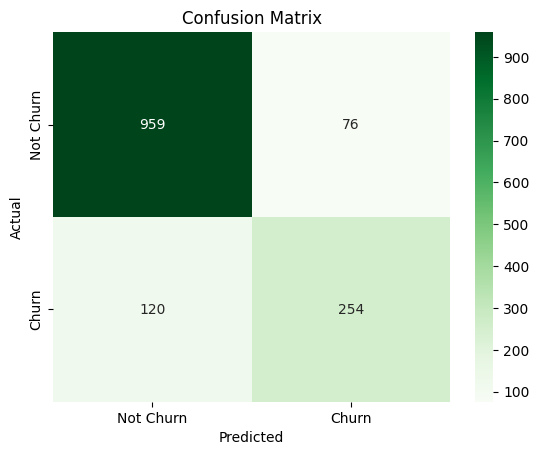

In [30]:
conf_matrix = confusion_matrix(y_test, y_pred_final)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=['Not Churn', 'Churn'], yticklabels=['Not Churn', 'Churn'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

/var/folders/dp/hrzpy61d7fj767t2tgp22ld40000gn/T/ipykernel_11257/3354809961.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')


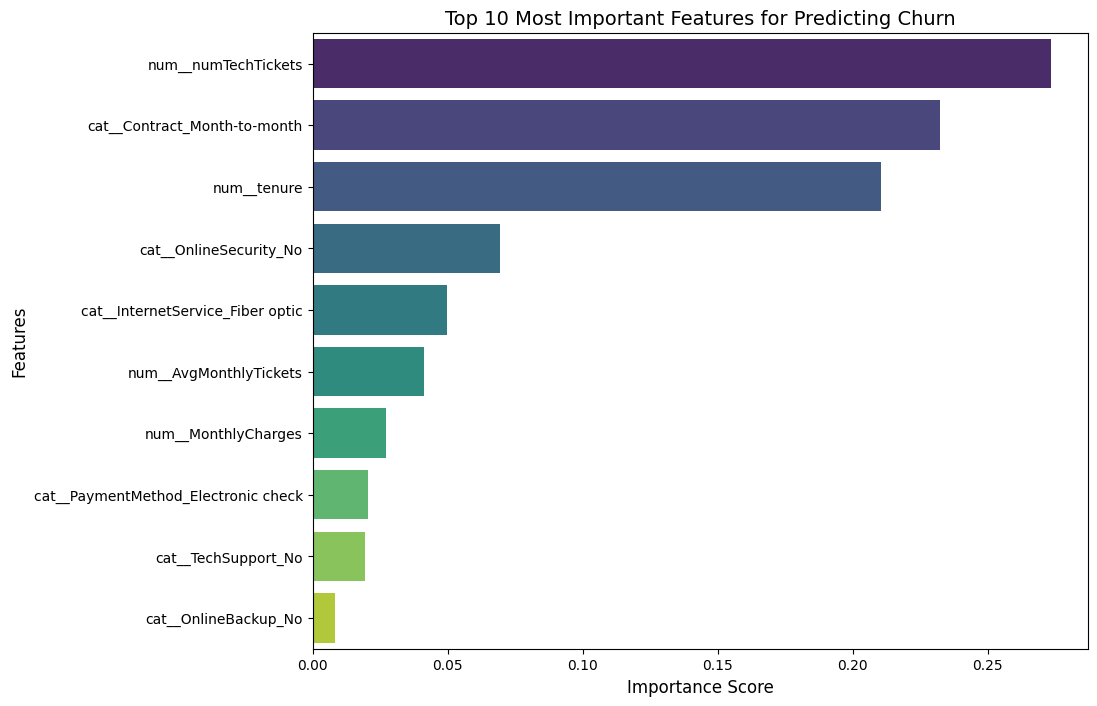

num__numTechTickets                    0.273271
cat__Contract_Month-to-month           0.232354
num__tenure                            0.210461
cat__OnlineSecurity_No                 0.069574
cat__InternetService_Fiber optic       0.049780
num__AvgMonthlyTickets                 0.041125
num__MonthlyCharges                    0.027342
cat__PaymentMethod_Electronic check    0.020378
cat__TechSupport_No                    0.019369
cat__OnlineBackup_No                   0.008486
dtype: float64


In [31]:
preprocessor = final_model.named_steps['preprocessor']
classifier = final_model.named_steps['classifier']

importances = classifier.feature_importances_
feature_names = preprocessor.get_feature_names_out()
feature_importance_series = pd.Series(importances, index=feature_names)
top_10_features = feature_importance_series.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_10_features.values, y=top_10_features.index, palette='viridis')
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Top 10 Most Important Features for Predicting Churn', fontsize=14)
plt.show()

print(top_10_features)

1. numTechTickeets: This is a direct measure of customer frustration. A high number of technical support tickets clearly indicates that the customer is experiencing frequent problems with their service. This poor experience is a major and direct cause of churn.

2. Contract(Month-to-Month): This is a powerful predictor. Customers on a month-to-month contract have no long-term commitment, making it easy for them to leave at any time without penalty.

3. Tenure: As seen in the initial data visualization, tenure is highly significant. Customers with a shorter tenure (newer customers) are far more likely to churn.

4. Online Security(No): This represents a lack of service integration. Customers who don't subscribe to add-ons like online security are less invested in the company's ecosystem.

5. Internet Service(fiber optic): While a premium service, fiber optic is associated with higher churn.

6. Average Month Tickets: This feature provides a nuanced view of the customer's experience compared to the total number of tickets

7. Monthly Charges: This is a straightforward driver related to price sensitivity. Customers with higher monthly bills are more likely to scrutinize the value they receive and actively look for cheaper alternatives from competitors.

8. Payment Method(Electronic Check): This is a behavioral indicator. Customers paying by electronic check may be less "locked-in" than those with automatic credit card billing. This payment method requires a manual monthly effort, giving the customer a regular opportunity to reconsider their subscription.

9. Tech Support(No): Similar to online security, not having a tech support subscription indicates a lower level of engagement. More importantly, it means customers who face technical issues may feel unsupported, leading to frustration and a higher likelihood of churning.

10. Online Backup(No): This feature reveals a customer's level of investment and integration into the service ecosystem. so by this we can say that a customer who is less embedded in the company's services, making them easier to lose.